In [1]:
import numpy as np
import matplotlib.pyplot as plt

## A simple dataset

In [3]:
x_train = np.array ([[4.7], [2.4], [7.5], [7.1], [4.3], 
                     [7.8], [8.9], [5.2], [4.59], [2.1], 
                     [8], [5], [7.5], [5], [4],
                     [8], [5.2], [4.9], [3], [4.7], 
                     [4], [4.8], [3.5], [2.1], [4.1]],
                    dtype = np.float32)

y_train = np.array ([[2.6], [1.6], [3.09], [2.4], [2.4], 
                     [3.3], [2.6], [1.96], [3.13], [1.76], 
                     [3.2], [2.1], [1.6], [2.5], [2.2], 
                     [2.75], [2.4], [1.8], [1], [2], 
                     [1.6], [2.4], [2.6], [1.5], [3.1]], 
                    dtype = np.float32)

## Exploring the dataset

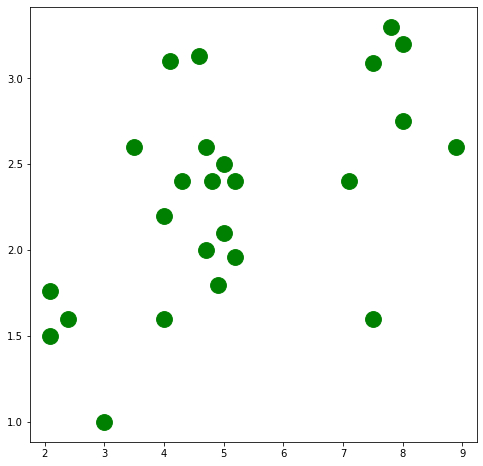

In [4]:
plt.figure(figsize=(8,8))
plt.scatter(x_train, y_train, c='green', s=250, label='Original data')
plt.show()

## Building the regression model

In [5]:
import torch

In [6]:
X_train = torch.from_numpy(x_train)
Y_train = torch.from_numpy(y_train)

print('requires_grad for X_train: ', X_train.requires_grad)
print('requires_grad for Y_train: ', Y_train.requires_grad)

requires_grad for X_train:  False
requires_grad for Y_train:  False


In [7]:
input_size = 1
hidden_size = 1
output_size = 1
learning_rate = 0.001

In [8]:
w1 = torch.rand(input_size,
                hidden_size,
                requires_grad=True)

w1.shape

torch.Size([1, 1])

In [9]:
b1 = torch.rand(input_size,
                hidden_size,
                requires_grad=True)

b1.shape

torch.Size([1, 1])

In [10]:
w1

tensor([[0.3467]], requires_grad=True)

In [11]:
b1

tensor([[0.9300]], requires_grad=True)

In [12]:
for iter in range(1, 4001):
    y_pred = X_train.mm(w1).clamp(min=0).add(b1)  # here, clamp simulates Relu activation after a linear layer
    loss = (y_pred - Y_train).pow(2).sum()
    
    if iter % 100 == 0:
        print(iter, loss.item())
    
    loss.backward()
    
    with torch.no_grad():    # diabling the gradient calculation
        w1 -= learning_rate * w1.grad
        b1 -= learning_rate * b1.grad
        w1.grad.zero_()
        b1.grad.zero_()

100 6.345425605773926
200 6.188999176025391
300 6.14107084274292
400 6.126384258270264
500 6.121884822845459
600 6.120506286621094
700 6.120083808898926
800 6.1199541091918945
900 6.119914531707764
1000 6.119901657104492
1100 6.119898796081543
1200 6.11989688873291
1300 6.11989688873291
1400 6.119896411895752
1500 6.11989688873291
1600 6.11989688873291
1700 6.119897842407227
1800 6.119897365570068
1900 6.119896411895752
2000 6.119896411895752
2100 6.119896411895752
2200 6.119896411895752
2300 6.119896411895752
2400 6.119896411895752
2500 6.119896411895752
2600 6.119896411895752
2700 6.119896411895752
2800 6.119896411895752
2900 6.119896411895752
3000 6.119896411895752
3100 6.119896411895752
3200 6.119896411895752
3300 6.119896411895752
3400 6.119896411895752
3500 6.119896411895752
3600 6.119896411895752
3700 6.119896411895752
3800 6.119896411895752
3900 6.119896411895752
4000 6.119896411895752


In [13]:
print('w1: ', w1)
print('b1: ', b1)

w1:  tensor([[0.1751]], requires_grad=True)
b1:  tensor([[1.4045]], requires_grad=True)


## Prediction using the trained model on the same dataset

In [15]:
x_train_tensor = torch.from_numpy(x_train)

x_train_tensor

tensor([[4.7000],
        [2.4000],
        [7.5000],
        [7.1000],
        [4.3000],
        [7.8000],
        [8.9000],
        [5.2000],
        [4.5900],
        [2.1000],
        [8.0000],
        [5.0000],
        [7.5000],
        [5.0000],
        [4.0000],
        [8.0000],
        [5.2000],
        [4.9000],
        [3.0000],
        [4.7000],
        [4.0000],
        [4.8000],
        [3.5000],
        [2.1000],
        [4.1000]])

In [16]:
predicted_in_tensor = x_train_tensor.mm(w1).clamp(min=0).add(b1)

predicted_in_tensor    # all of the predicted values

tensor([[2.2273],
        [1.8247],
        [2.7175],
        [2.6475],
        [2.1573],
        [2.7701],
        [2.9626],
        [2.3149],
        [2.2081],
        [1.7721],
        [2.8051],
        [2.2799],
        [2.7175],
        [2.2799],
        [2.1048],
        [2.8051],
        [2.3149],
        [2.2624],
        [1.9297],
        [2.2273],
        [2.1048],
        [2.2448],
        [2.0172],
        [1.7721],
        [2.1223]], grad_fn=<AddBackward0>)

In [17]:
predicted = predicted_in_tensor.detach().numpy()
predicted

array([[2.2273371],
       [1.8246689],
       [2.717542 ],
       [2.6475127],
       [2.1573079],
       [2.7700639],
       [2.9626443],
       [2.3148737],
       [2.208079 ],
       [1.7721468],
       [2.8050785],
       [2.279859 ],
       [2.717542 ],
       [2.279859 ],
       [2.104786 ],
       [2.8050785],
       [2.3148737],
       [2.2623518],
       [1.9297128],
       [2.2273371],
       [2.104786 ],
       [2.2448444],
       [2.0172493],
       [1.7721468],
       [2.1222932]], dtype=float32)

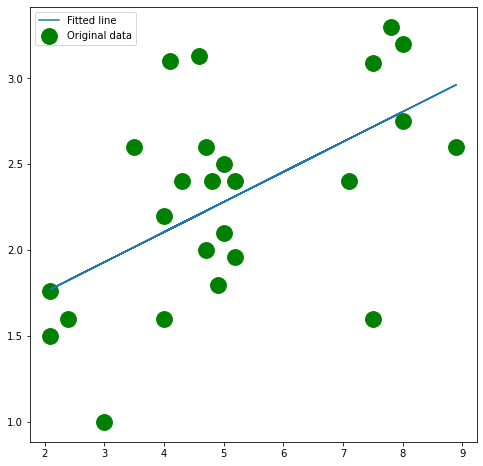

In [18]:
plt.figure(figsize=(8, 8))
plt.scatter(x_train, y_train, c='green', s=250, label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()

## Comparing this hand-crafted regression model with linear regression estimator in scikit-learn

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
reg = LinearRegression().fit(x_train, y_train)

In [21]:
print("w1 with sklearn is: ", reg.coef_)

w1 with sklearn is:  [[0.17507163]]


In [22]:
print("b1 with sklearn is: ", reg.intercept_)

b1 with sklearn is:  [1.4045022]


In [24]:
predicted = reg.predict(x_train)

predicted

array([[2.2273388],
       [1.8246741],
       [2.7175393],
       [2.6475105],
       [2.1573102],
       [2.770061 ],
       [2.9626396],
       [2.3148746],
       [2.208081 ],
       [1.7721525],
       [2.8050752],
       [2.2798603],
       [2.7175393],
       [2.2798603],
       [2.1047888],
       [2.8050752],
       [2.3148746],
       [2.2623532],
       [1.9297171],
       [2.2273388],
       [2.1047888],
       [2.2448459],
       [2.017253 ],
       [1.7721525],
       [2.1222959]], dtype=float32)

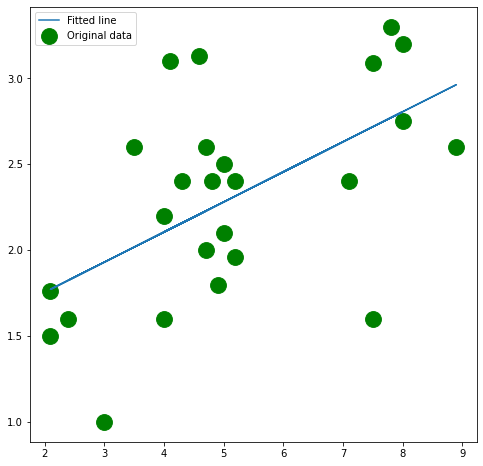

In [25]:
plt.figure(figsize=(8, 8))
plt.scatter(x_train, y_train, c='green', s=250, label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()